In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load your dataset
df = pd.read_csv("delhivery.csv")

In [3]:
df.head()

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144867 entries, 0 to 144866
Data columns (total 24 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   data                            144867 non-null  object 
 1   trip_creation_time              144867 non-null  object 
 2   route_schedule_uuid             144867 non-null  object 
 3   route_type                      144867 non-null  object 
 4   trip_uuid                       144867 non-null  object 
 5   source_center                   144867 non-null  object 
 6   source_name                     144574 non-null  object 
 7   destination_center              144867 non-null  object 
 8   destination_name                144606 non-null  object 
 9   od_start_time                   144867 non-null  object 
 10  od_end_time                     144867 non-null  object 
 11  start_scan_to_end_scan          144867 non-null  float64
 12  is_cutoff       

In [5]:
df.describe()

,start_scan_to_end_scan,cutoff_factor,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
count,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.000000,144867.00000,144867.000000
mean,961.262986,232.926567,234.073372,416.927527,213.868272,284.771297,2.120107,36.196111,18.507548,22.82902,2.218368
std,1037.012769,344.755577,344.990009,598.103621,308.011085,421.119294,1.715421,53.571158,14.775960,17.86066,4.847530
min,20.000000,9.000000,9.000045,9.000000,6.000000,9.008200,0.144000,-244.000000,0.000000,0.00000,-23.444444
25%,161.000000,22.000000,23.355874,51.000000,27.000000,29.914700,1.604264,20.000000,11.000000,12.07010,1.347826
50%,449.000000,66.000000,66.126571,132.000000,64.000000,78.525800,1.857143,29.000000,17.000000,23.51300,1.684211
75%,1634.000000,286.000000,286.708875,513.000000,257.000000,343.193250,2.213483,40.000000,22.000000,27.81325,2.250000
max,7898.000000,1927.000000,1927.447705,4532.000000,1686.000000,2326.199100,77.387097,3051.000000,1611.000000,2191.40370,574.250000


In [6]:
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)

In [8]:
# 📌 Step 2: Dataset Already Loaded
# Skipping file upload since 'df' is already available

# 📌 Step 3: Initial Data Overview
print("🔍 Dataset Shape:", df.shape)
print("📋 Columns:", df.columns.tolist())
df.head()


🔍 Dataset Shape: (144867, 24)
📋 Columns: ['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type', 'trip_uuid', 'source_center', 'source_name', 'destination_center', 'destination_name', 'od_start_time', 'od_end_time', 'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor', 'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time', 'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time', 'segment_osrm_time', 'segment_osrm_distance', 'segment_factor']


,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000


In [9]:
# 📌 Step 4: Data Cleaning & Type Conversion
# Convert timestamps to datetime
datetime_cols = ['trip_creation_time', 'od_start_time', 'od_end_time', 'cutoff_timestamp']
for col in datetime_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [10]:
# Convert boolean and categorical columns
df['is_cutoff'] = df['is_cutoff'].astype(bool)
df['route_type'] = df['route_type'].astype('category')
df['data'] = df['data'].astype('category')

In [11]:
# 📌 Step 5: Summary Metrics
total_shipments = df['trip_uuid'].nunique()
total_distance = df['actual_distance_to_destination'].sum()
avg_delivery_time = df['actual_time'].mean()
on_time_pct = 100 * df[df['is_cutoff'] == False].shape[0] / df.shape[0]
delayed_pct = 100 - on_time_pct

In [12]:
print(f"🚚 Total Shipments: {total_shipments}")
print(f"🛣️ Total Distance Covered: {total_distance:.2f}")
print(f"⏱️ Average Delivery Time: {avg_delivery_time:.2f}")
print(f"✅ On-Time Deliveries (%): {on_time_pct:.2f}")
print(f"⚠️ Delayed Shipments (%): {delayed_pct:.2f}")

🚚 Total Shipments: 14817
🛣️ Total Distance Covered: 33909507.13
⏱️ Average Delivery Time: 416.93
✅ On-Time Deliveries (%): 18.03
⚠️ Delayed Shipments (%): 81.97


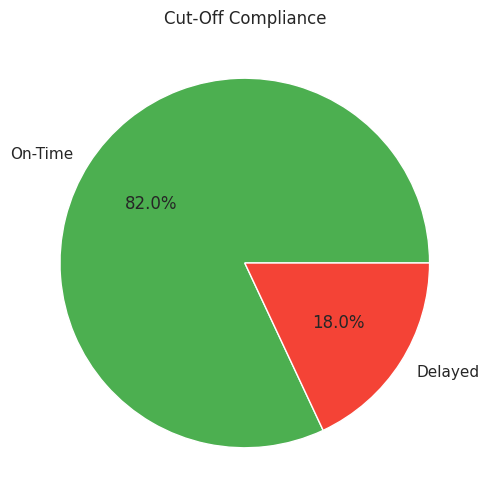

In [13]:
# 📌 Step 6: Pie Chart - Cut-Off Analysis
cutoff_counts = df['is_cutoff'].value_counts()
plt.pie(cutoff_counts, labels=['On-Time', 'Delayed'], autopct='%1.1f%%', colors=['#4CAF50', '#F44336'])
plt.title("Cut-Off Compliance")
plt.show()

/tmp/ipython-input-3032880646.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='route_type', palette='Set2')


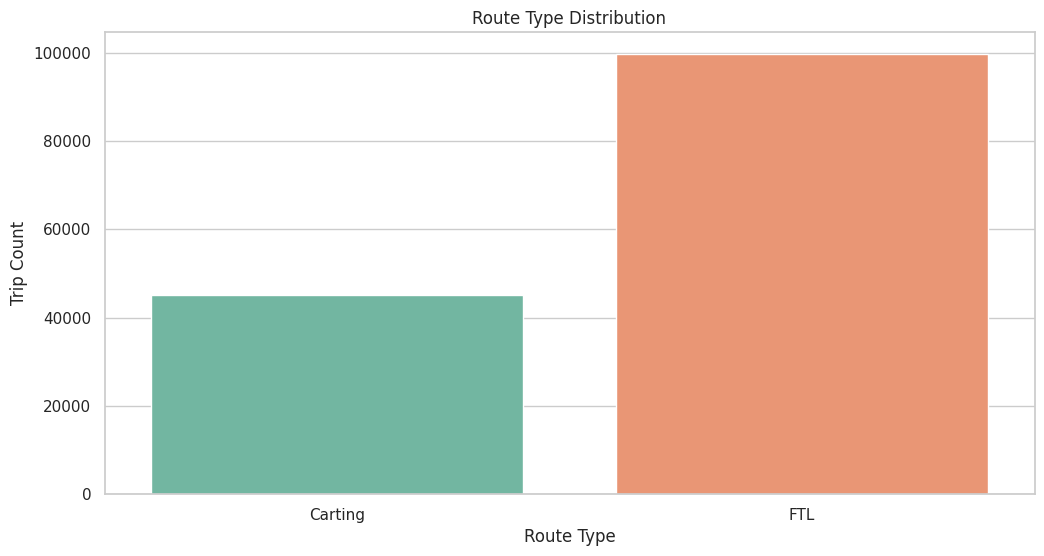

In [14]:
# 📌 Step 7: Bar Chart - Route Type Distribution
sns.countplot(data=df, x='route_type', palette='Set2')
plt.title("Route Type Distribution")
plt.xlabel("Route Type")
plt.ylabel("Trip Count")
plt.show()

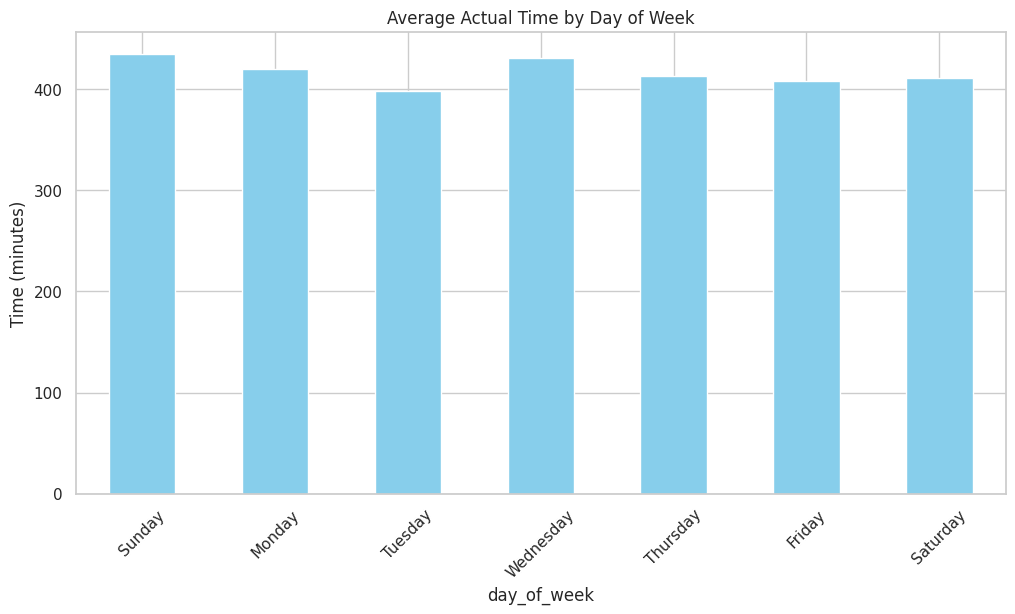

In [15]:
# 📌 Step 8: Average Actual Time by Day of Week
df['day_of_week'] = df['od_start_time'].dt.day_name()
avg_time_by_day = df.groupby('day_of_week')['actual_time'].mean().reindex([
    'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'
])
avg_time_by_day.plot(kind='bar', color='skyblue')
plt.title("Average Actual Time by Day of Week")
plt.ylabel("Time (minutes)")
plt.xticks(rotation=45)
plt.show()

/tmp/ipython-input-1595744980.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trip_counts = df.groupby(['month', 'route_type'])['trip_uuid'].count().unstack().fillna(0)


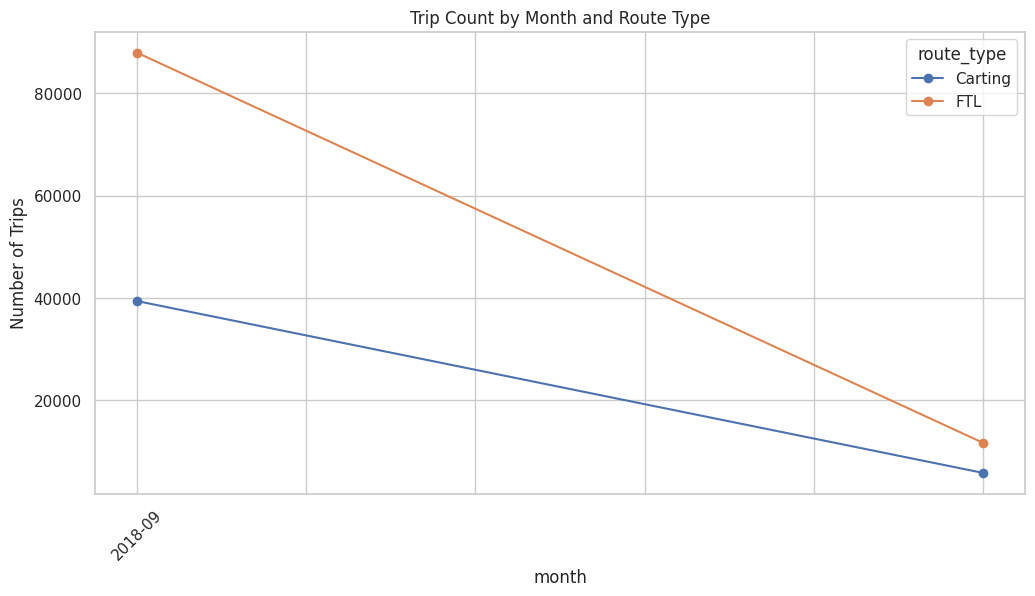

In [16]:
# 📌 Step 9: Line Chart - Trip Count by Month & Route Type
df['month'] = df['trip_creation_time'].dt.to_period('M').astype(str)
trip_counts = df.groupby(['month', 'route_type'])['trip_uuid'].count().unstack().fillna(0)
trip_counts.plot(marker='o')
plt.title("Trip Count by Month and Route Type")
plt.ylabel("Number of Trips")
plt.xticks(rotation=45)
plt.show()

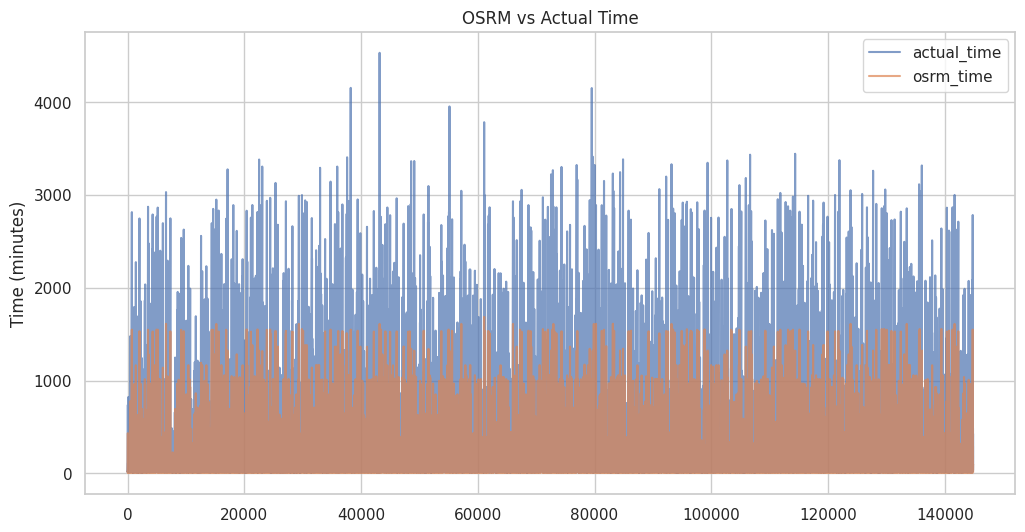

In [17]:

# 📌 Step 10: Line Chart - OSRM vs Actual Time
df[['actual_time', 'osrm_time']].plot(alpha=0.7)
plt.title("OSRM vs Actual Time")
plt.ylabel("Time (minutes)")
plt.show()

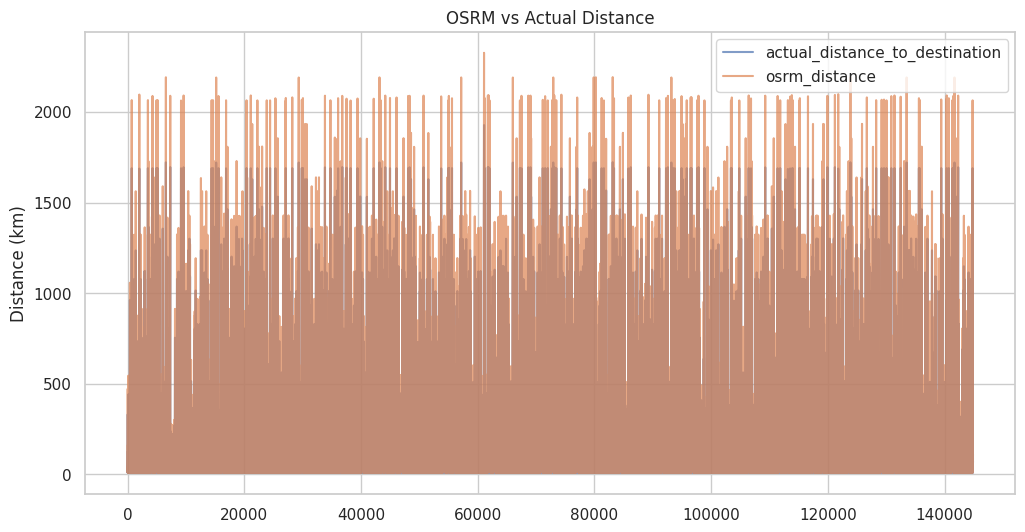

In [18]:
# 📌 Step 11: Line Chart - OSRM vs Actual Distance
df[['actual_distance_to_destination', 'osrm_distance']].plot(alpha=0.7)
plt.title("OSRM vs Actual Distance")
plt.ylabel("Distance (km)")
plt.show()

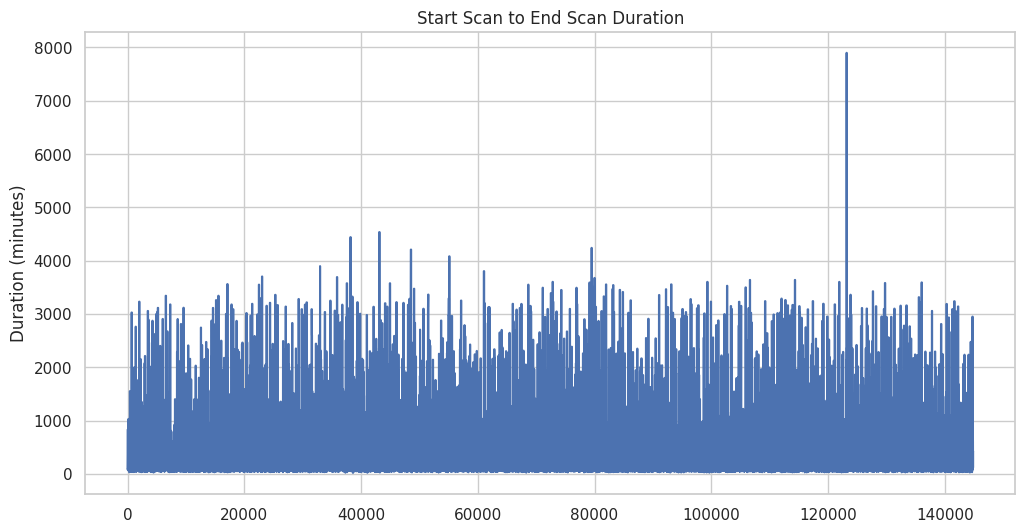

In [19]:

# 📌 Step 12: Line Chart - Start Scan to End Scan Duration
df['start_scan_to_end_scan'].plot()
plt.title("Start Scan to End Scan Duration")
plt.ylabel("Duration (minutes)")
plt.show()



/tmp/ipython-input-2712219849.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  compliance = df.groupby(['day_of_week', 'time_slot'])['is_cutoff'].apply(lambda x: 100 * (~x).mean()).unstack()


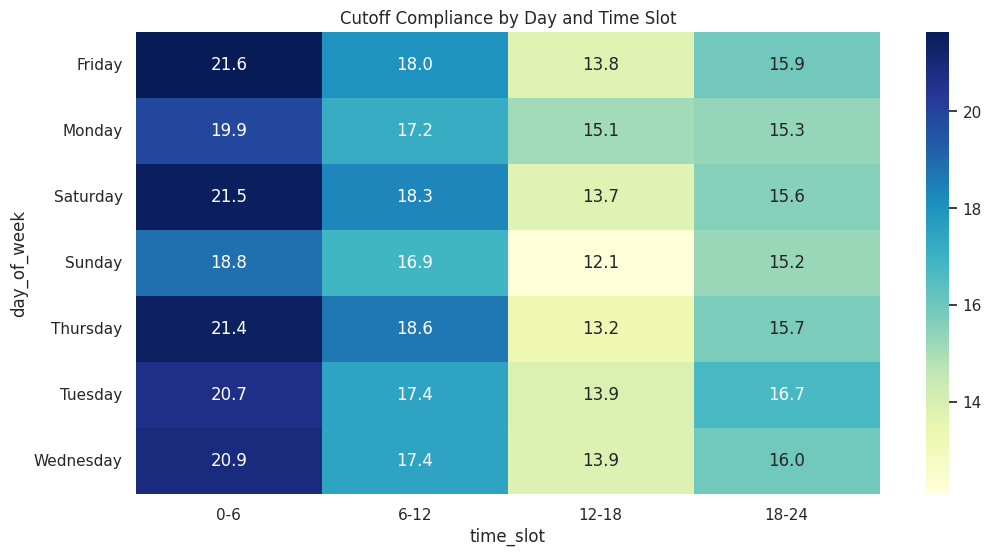

In [20]:
# 📌 Step 13: Heatmap - Cutoff Compliance by Day and Time Slot
df['hour'] = df['od_start_time'].dt.hour
df['time_slot'] = pd.cut(df['hour'], bins=[0, 6, 12, 18, 24], labels=['0-6', '6-12', '12-18', '18-24'])
compliance = df.groupby(['day_of_week', 'time_slot'])['is_cutoff'].apply(lambda x: 100 * (~x).mean()).unstack()
sns.heatmap(compliance, annot=True, fmt=".1f", cmap="YlGnBu")
plt.title("Cutoff Compliance by Day and Time Slot")
plt.show()